In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [18]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')

## Taking a look into the first few rows of our data

In [19]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Checking for Missing Value

In [20]:
df.isnull().sum().max()

0

Good to see that there is no missing value! Let's continue with our data

### Let's see the distribution of the Class column

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

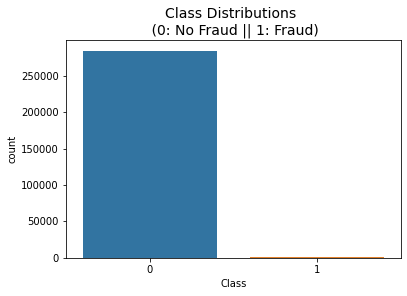

In [21]:
sns.countplot('Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

We can see that most of the data falls under No fraud ! This shows how imbalanced our data :( If we continue to use this data for further predictive analysis, it will be overfit and this will be a big trouble for us 

### Now lets take a look at the amount and time column as the other columns are principle components obtained by PCA

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time', ylabel='Density'>

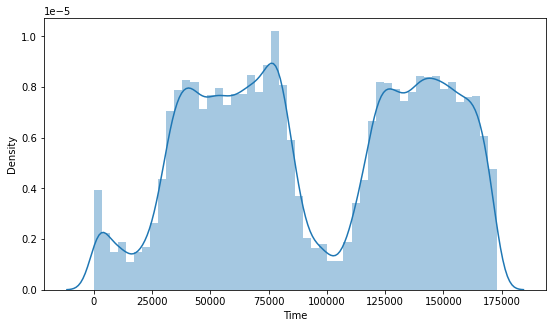

In [22]:
plt.figure(figsize = (9,5))
sns.distplot(df['Time'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount', ylabel='Density'>

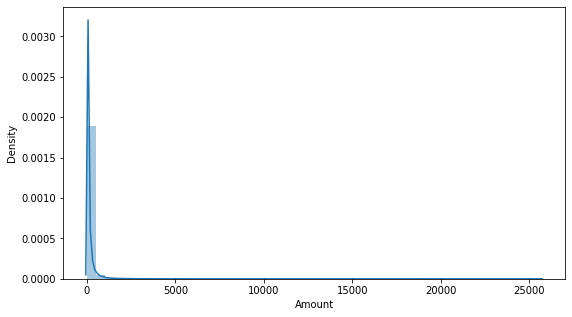

In [23]:
plt.figure(figsize = (9,5))
sns.distplot(df['Amount'])

We can see that our data is very skewed, so now we will further the analysis by using scaling method.

In [24]:
ss = StandardScaler()
df['scaled_amount'] = ss.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = ss.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Amount', 'Time'], axis = 1, inplace= True)

In [25]:
fraud_df = df[df['Class']==1]
non_fraud_df = df[df["Class"]==0]

non_fraud_df1 = non_fraud_df.sample(fraud_df.shape[0])

final_df = pd.concat([fraud_df, non_fraud_df1])

In [26]:
final_df.shape

(984, 31)

## Summary 
* Scaled amount and scaled time are the columns with scaled values.
* There are 492 cases of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe.
* Lastly, we concatenate 492 cases of fraud and non fraud into final_df

### Now let's split our data into Training and Test set

In [27]:
X = final_df.drop('Class',axis=1)
y = final_df['Class']

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=41,stratify = y)

We will classify our data on Machine Learning Methods (KNN, SVM, Logistic Regression and Random Forest) Let's see which one is the best classifier

# 1. K Nearest Neighbor

In [30]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

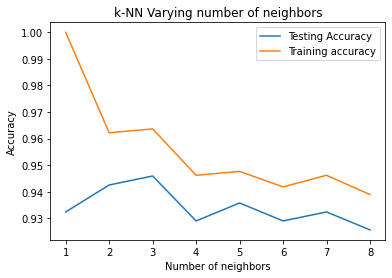

In [31]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can see that the testing accuracy is highest at 3 so i will pick 3 for n_neighbors

In [33]:
model1 = KNeighborsClassifier(n_neighbors=3)
KNN = model1.fit(X_train, y_train)

In [34]:
y_pred_knn = model1.predict(X_test)

#AUC
y_pred_knn_proba = model1.predict_proba(X_test)[::,1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test,  y_pred_knn_proba)
auc_knn = metrics.roc_auc_score(y_test, y_pred_knn_proba)

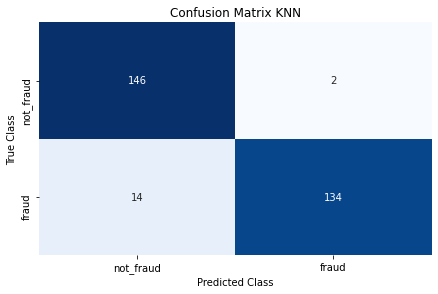

In [35]:
#print CM
matrix_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn = pd.DataFrame(matrix_knn, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_knn, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix KNN"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

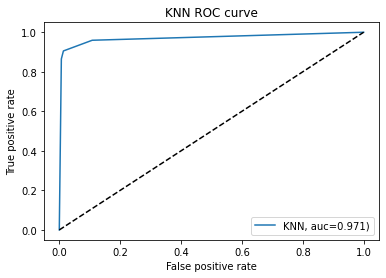

In [36]:
#ROC
plt.plot(fpr_knn,tpr_knn,label="KNN, auc={:.3f})".format(auc_knn))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNN ROC curve')
plt.legend(loc=4)
plt.show()

In [37]:
print(metrics.confusion_matrix(y_test, y_pred_knn), "\n")
print("Accuracy KNN", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision KNN", metrics.precision_score(y_test,y_pred_knn))
print("Recall KNN", metrics.recall_score(y_test,y_pred_knn))
print("AUC KNN :", auc_knn)
confusion=confusion_matrix(y_test,y_pred_knn)    
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print("Sensitivity KNN",TP / float(TP+FN))
# positive predictive value 
print ("Positive Predection Rate KNN",TP / float(TP+FP))
# Negative predictive value
print ("Negative Predection rate KNN",TN / float(TN+ FN))
# Calculate false postive rate - predicting churn when customer does not have churned
print("False positive Predection Rate KNN",FP/ float(TN+FP))

[[146   2]
 [ 14 134]] 

Accuracy KNN 0.9459459459459459
Precision KNN 0.9852941176470589
Recall KNN 0.9054054054054054
AUC KNN : 0.970918553688824
Sensitivity KNN 0.9054054054054054
Positive Predection Rate KNN 0.9852941176470589
Negative Predection rate KNN 0.9125
False positive Predection Rate KNN 0.013513513513513514


# 2.Logistic Regression

In [38]:
model2 = LogisticRegression(random_state=2)
logit = model2.fit(X_train, y_train)

In [39]:
y_pred_logit = model2.predict(X_test)

#AUC
y_pred_logit_proba = model1.predict_proba(X_test)[::,1]
fpr_logit, tpr_logit, _ = metrics.roc_curve(y_test,  y_pred_logit_proba)
auc_logit = metrics.roc_auc_score(y_test, y_pred_logit_proba)

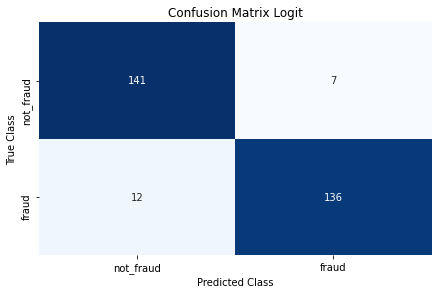

In [40]:
#print CM
matrix_logit = confusion_matrix(y_test, y_pred_logit)
cm_logit = pd.DataFrame(matrix_logit, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logit"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [41]:
y_pred_logit_proba = model1.predict_proba(X_test)[::,1]
fpr_logit, tpr_logit, _ = metrics.roc_curve(y_test,  y_pred_logit_proba)
auc_logit = metrics.roc_auc_score(y_test, y_pred_logit_proba)

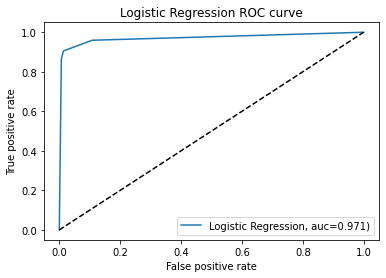

In [42]:
#ROC
plt.plot(fpr_logit,tpr_logit,label="Logistic Regression, auc={:.3f})".format(auc_logit))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc=4)
plt.show()

In [43]:
print(metrics.confusion_matrix(y_test, y_pred_logit), "\n")
print("Accuracy Logit", metrics.accuracy_score(y_test, y_pred_logit))
print("Precision Logit", metrics.precision_score(y_test,y_pred_logit))
print("Recall Logit", metrics.recall_score(y_test,y_pred_logit))
print("AUC Logit :", auc_logit)
confusion=confusion_matrix(y_test,y_pred_logit)    
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print("Sensitivity Logit",TP / float(TP+FN))
# positive predictive value 
print ("Positive Predection Rate Logit",TP / float(TP+FP))
# Negative predictive value
print ("Negative Predection rate Logit",TN / float(TN+ FN))
# Calculate false postive rate - predicting churn when customer does not have churned
print("False positive Predection Rate Logit",FP/ float(TN+FP))

[[141   7]
 [ 12 136]] 

Accuracy Logit 0.9358108108108109
Precision Logit 0.951048951048951
Recall Logit 0.918918918918919
AUC Logit : 0.970918553688824
Sensitivity Logit 0.918918918918919
Positive Predection Rate Logit 0.951048951048951
Negative Predection rate Logit 0.9215686274509803
False positive Predection Rate Logit 0.0472972972972973


# 3. Support Vector Machine

In [44]:
#train the model
model3 = SVC(probability=True, random_state=2)
svm = model3.fit(X_train, y_train)

In [45]:
y_pred_svm = model3.predict(X_test)

#AUC
y_pred_svm_proba = model2.predict_proba(X_test)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test,  y_pred_svm_proba)
auc_svm = metrics.roc_auc_score(y_test, y_pred_svm_proba)

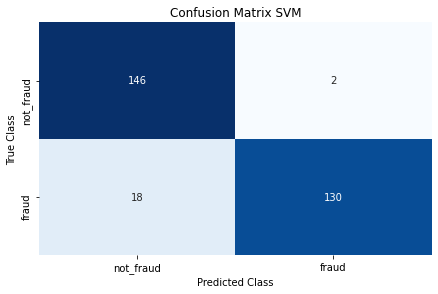

In [46]:
#CM matrix
matrix_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm = pd.DataFrame(matrix_svm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_svm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

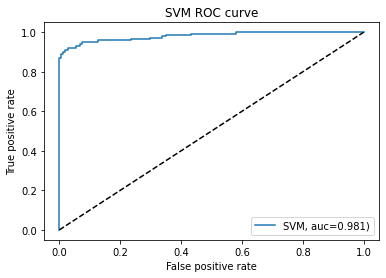

In [47]:
#ROC
plt.plot(fpr_svm,tpr_svm,label="SVM, auc={:.3f})".format(auc_svm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc=4)
plt.show()

In [48]:
print(metrics.confusion_matrix(y_test, y_pred_svm), "\n")
print("Accuracy SVM", metrics.accuracy_score(y_test, y_pred_svm))
print("Precision SVM", metrics.precision_score(y_test,y_pred_svm))
print("Recall SVM", metrics.recall_score(y_test,y_pred_svm))
print("AUC SVM :", auc_logit)
confusion=confusion_matrix(y_test,y_pred_svm)    
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print("Sensitivity SVM",TP / float(TP+FN))
# positive predictive value 
print ("Positive Predection Rate SVM",TP / float(TP+FP))
# Negative predictive value
print ("Negative Predection rate SVM",TN / float(TN+ FN))
# Calculate false postive rate - predicting churn when customer does not have churned
print("False positive Predection Rate SVM",FP/ float(TN+FP))

[[146   2]
 [ 18 130]] 

Accuracy SVM 0.9324324324324325
Precision SVM 0.9848484848484849
Recall SVM 0.8783783783783784
AUC SVM : 0.970918553688824
Sensitivity SVM 0.8783783783783784
Positive Predection Rate SVM 0.9848484848484849
Negative Predection rate SVM 0.8902439024390244
False positive Predection Rate SVM 0.013513513513513514


# 4. Random Forest

In [49]:
#train the model
model4 = RandomForestClassifier(random_state=2)
rf = model4.fit(X_train, y_train)

In [55]:
y_pred_rf = model4.predict(X_test)

#AUC
y_pred_rf_proba = model4.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_pred_rf_proba)
auc_rf = metrics.roc_auc_score(y_test, y_pred_rf_proba)

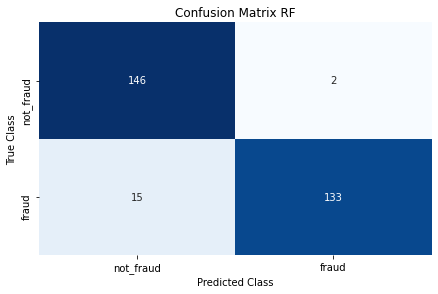

In [56]:
#CM matrix
matrix_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf = pd.DataFrame(matrix_rf, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_rf, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix RF"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

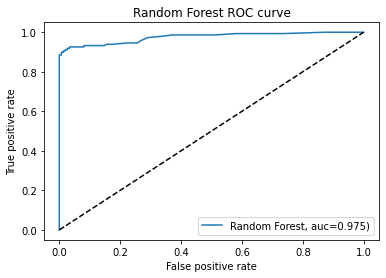

In [57]:
#ROC
plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc={:.3f})".format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc=4)
plt.show()

In [58]:
print(metrics.confusion_matrix(y_test, y_pred_rf), "\n")
print("Accuracy Random Forest", metrics.accuracy_score(y_test, y_pred_rf))
print("Precision Random Forest", metrics.precision_score(y_test,y_pred_rf))
print("Recall Random Forest", metrics.recall_score(y_test,y_pred_rf))
print("AUC Random Forest :", auc_rf)
confusion=confusion_matrix(y_test,y_pred_rf)    
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print("Sensitivity Random Forest",TP / float(TP+FN))
# positive predictive value 
print ("Positive Predection Rate Random Forest",TP / float(TP+FP))
# Negative predictive value
print ("Negative Predection rate Random Forest",TN / float(TN+ FN))
# Calculate false postive rate - predicting churn when customer does not have churned
print("False positive Predection Rate Random Forest",FP/ float(TN+FP))

[[146   2]
 [ 15 133]] 

Accuracy Random Forest 0.9425675675675675
Precision Random Forest 0.9851851851851852
Recall Random Forest 0.8986486486486487
AUC Random Forest : 0.9753469685902119
Sensitivity Random Forest 0.8986486486486487
Positive Predection Rate Random Forest 0.9851851851851852
Negative Predection rate Random Forest 0.906832298136646
False positive Predection Rate Random Forest 0.013513513513513514


# Recall Score for all Machine Learning Method

1. KNN : 0.905 
2. Logistic Regression : 0.919
3. SVM : 0.878
4. Random Forest : 0.899

# Undersampled data

We can see that Logistic regression perform best compared with SVM, KNN and Decision with excellent recall and precision score of 0.92 and 0.95